# Assignment 2(part 2)
### Q. Implement k-NN using Python (both scratch and sk learn) to perform classification on IRIS dataset.

#### PLOT the data set
#### PLOT graph for accuracy vs k value

#### Split the dataset into train and test set. (in ratio 70:30)


# Solution

### Importing libraries

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Load the dataset

In [10]:
iris_data = pd.read_csv('C:/Users/u/Downloads/Iris.csv')
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Extract features and labels

In [34]:
X = iris_data.iloc[:, 1:5].values
y = iris_data.iloc[:, 5].values

### Split the dataset into training and testing sets(70:30)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Implement k-NN from scratch

In [36]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x) for x in X_train]
    k_neighbors_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_neighbors_indices]
    return np.bincount(k_nearest_labels).argmax()

def predict_from_scratch(X_train, y_train, X_test, k):
    predictions = [k_nearest_neighbors(X_train, y_train, x_test, k) for x_test in X_test]
    return np.array(predictions)

### Plot the dataset 

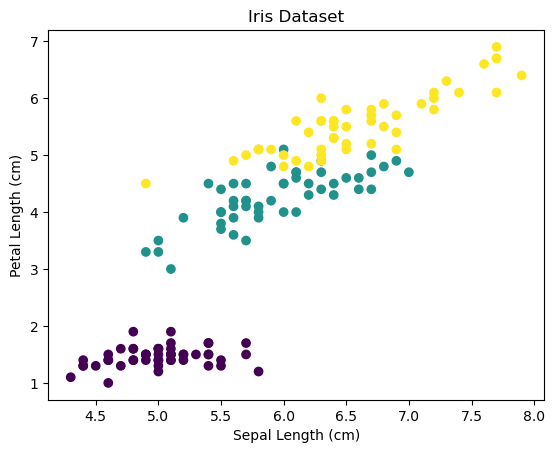

In [37]:
plt.scatter(X[:, 0], X[:, 2], c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Dataset')
plt.show()

### Plot accuracy vs k value

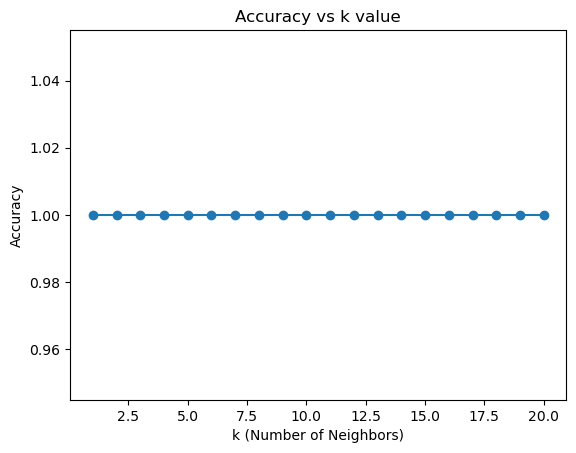

In [38]:
k_values = list(range(1, 21))
accuracy_scores = []

for k in k_values:
    y_pred = predict_from_scratch(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k value')
plt.show()

### Implement k-NN using scikit-learn

In [40]:
accuracy_scores_sklearn = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_sklearn = knn_model.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    accuracy_scores_sklearn.append(accuracy_sklearn)

### Plot accuracy vs k value

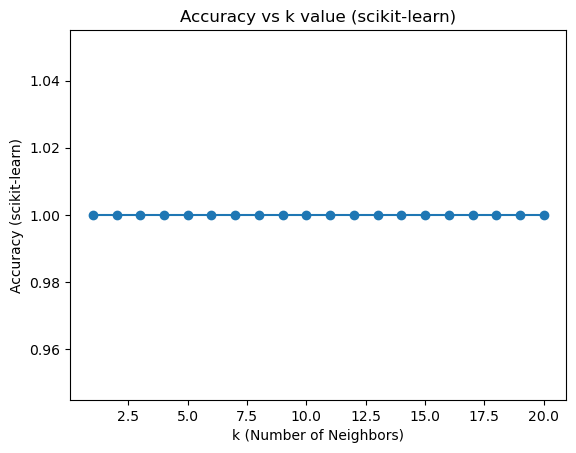

In [41]:
plt.plot(k_values, accuracy_scores_sklearn, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (scikit-learn)')
plt.title('Accuracy vs k value (scikit-learn)')
plt.show()